# ch03.02 NLP기초 - imdb 리뷰 분류
---

* 날짜:
* 이름:

## 학습내용
    - 텍스트 전처리 과정을 이해한다.
      * 텍스트 토큰화
      * 텍스트 인덱싱
      * 원-핫 인코딩
      * 텍스트 임베딩
    - 간단한 문장을 분류하는 딥러닝 모델을 구현한다.



```
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning
```

In [ ]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning

fatal: destination path 'SkillTreePython-DeepLearning' already exists and is not an empty directory.


```
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/scripts')
from import_lib import *
```

In [ ]:
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/scripts')
from import_lib import *

## FCN 모델을 이용한 영화리뷰 분류
---

### **| 데이터 처리**

In [ ]:
from tensorflow.keras.datasets import imdb
# FCN: fully conneted network (Dense layer)
max_features = 500  # 다차원 데이터를 다루기 위해서는 FCN으로는 어렵다

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words= max_features) 
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


In [ ]:
print('첫번째 리뷰:', x_train[0])
print('첫번째 리뷰의 단어 개수:', len(x_train[0]))
print('첫번째 리뷰 클래스:', y_train[0])

첫번째 리뷰: [1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
첫번째 리뷰의 단어 개수: 218
첫번째 리뷰 클래스: 1


첫번째 리뷰 클래스: 1


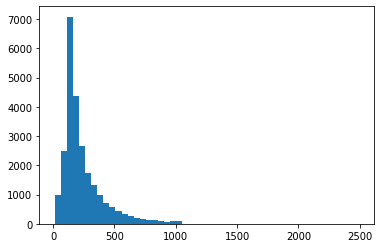

In [ ]:
# 문장 안에 단어가 몇개씩 들어있는가
x_lens = [len(x) for x in x_train]
_=plt.hist(x_lens, bins=50)



In [ ]:
# 딕셔너리
word2index = imdb.get_word_index()
word2index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
index2word = {}
for word, idx in word2index.items():
  index2word[idx+3]=word



In [ ]:
# n번째 리뷰 해석
review = x_train[5]
trans = []
for index in review:
  if index in index2word.keys():
    trans.append(index2word[index])
print(' '.join(x for x in trans))

better than it funny that the all other actors it's like those scenes where br br part the was to the whole story it just does not br br


In [ ]:
print('imdb 데이터에 있는 모든 단어 수 :', len(word2index), len(index2word))
print('우리가 사용할 단어 수  :', max_features)

imdb 데이터에 있는 모든 단어 수 : 88584 88584
우리가 사용할 단어 수  : 500


In [ ]:
print('빈도가 높은 단어:', index2word[4], index2word[5], index2word[6])

빈도가 높은 단어: the and a


In [ ]:
from tensorflow.keras.datasets import imdb
# FCN: fully conneted network (Dense layer)
max_features = 500  # 다차원 데이터를 다루기 위해서는 FCN으로는 어렵다
max_len = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words= max_features) 
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

print('패딩 전:', x_train.shape, x_test.shape)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)
print('패딩 후:', x_train.shape, x_test.shape)

(25000,) (25000,) (25000,) (25000,)
패딩 전: (25000,) (25000,)
패딩 후: (25000, 100) (25000, 100)


### **| 모델 학습**

In [ ]:
def create_model(max_len, max_features, emb_dims):
  x = layers.Input(shape=max_len)
  y = layers.Embedding(max_features, emb_dims)(x)
  y = layers.Flatten()(y)
  y = layers.Dense(32, activation='relu')(y)
  y = layers.Dense(1, activation='sigmoid')(y)
  return models.Model(x,y)

In [ ]:
model = create_model(max_len, max_features, 100)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 100, 100)          50000     
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                320032    
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 370,065
Trainable params: 370,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 5s 7ms/step - loss: 0.5182 - acc: 0.7280 - val_loss: 0.4529 - val_acc: 0.7844
Epoch 2/20
625/625 [==============================] - 4s 6ms/step - loss: 0.3495 - acc: 0.8457 - val_loss: 0.4866 - val_acc: 0.7748
Epoch 3/20
625/625 [==============================] - 4s 6ms/step - loss: 0.2069 - acc: 0.9182 - val_loss: 0.6068 - val_acc: 0.7608
Epoch 4/20
625/625 [==============================] - 4s 6ms/step - loss: 0.0925 - acc: 0.9675 - val_loss: 0.8185 - val_acc: 0.7544
Epoch 5/20
625/625 [==============================] - 4s 6ms/step - loss: 0.0376 - acc: 0.9892 - val_loss: 1.0722 - val_acc: 0.7488
Epoch 6/20
625/625 [==============================] - 4s 6ms/step - loss: 0.0211 - acc: 0.9941 - val_loss: 1.3127 - val_acc: 0.7520
Epoch 7/20
625/625 [==============================] - 4s 6ms/step - loss: 0.0382 - acc: 0.9870 - val_loss: 1.3290 - val_acc: 0.7446
Epoch 8/20
625/625 [==============================] - 4s 6ms/step - loss: 0.

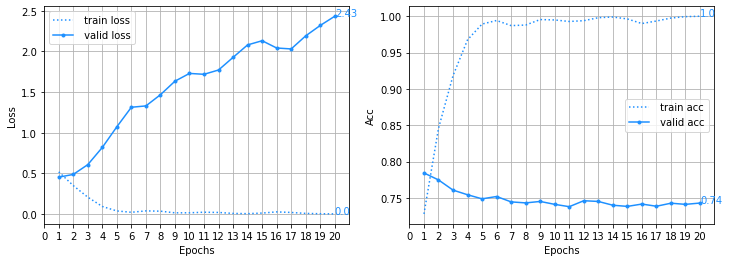

In [ ]:
from plot_result import plot_lcurve
plot_lcurve([history],[''],['dodgerblue'])

## 사전 훈련된 Embedding 사용하기
---



### **| GloVe 단어 임베딩 내려받기**

```
https://drive.google.com/u/0/uc?id=1ams5_zp8NrfmbxSzTDCglRpAvjFGi5JY&export=download
```

In [ ]:
! gdown https://drive.google.com/u/0/uc?id=1ams5_zp8NrfmbxSzTDCglRpAvjFGi5JY&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1ams5_zp8NrfmbxSzTDCglRpAvjFGi5JY
To: /content/glove.6B.zip
100% 862M/862M [00:04<00:00, 180MB/s]


In [ ]:
! unzip /content/glove.6B.zip

Archive:  /content/glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
f = open('/content/glove.6B.100d.txt', encoding='utf8')
word2embedding = {}
for line in f:
  word = line.split()[0] # 가장 첫번째가 단어
  vec = line.split()[1:] # 그 후는 단어에 대한 벡터
  vec = np.asarray(vec, dtype='float32')
  #print(word,len(vec))
  #break
  word2embedding[word] = vec     # 딕셔너리 dic[key] = value 추가하는방법
f.close()

In [ ]:
len(word2embedding) # 40만개의 단어

400000

### **| 임베딩 매트릭스 제작**


In [ ]:
print('imdb 딕셔너리의 모든 단어수 :', len(word2index))
print('우리 모델에서 사용할 모든 단어 수 :', max_features)
print('glove 임베딩에 있는 모든 단어 수 : ', len(word2embedding))

imdb 딕셔너리의 모든 단어수 : 88584
우리 모델에서 사용할 모든 단어 수 : 500
glove 임베딩에 있는 모든 단어 수 :  400000


In [ ]:
embed_mx = np.zeros((max_features, 100))
# 매트릭스의 크기 : (500, 100)

In [ ]:
for idx in range(4, 504):
  word = index2word[idx]
  embed = word2embedding.get(word) # 딕셔너리.get 함수는 없으면 None값 반환
  #print(word, embed)
  if embed is not None:
    embed_mx[idx-4] = embed

In [ ]:
embed_mx

array([[-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       [-0.27085999,  0.044006  , -0.02026   , ..., -0.4923    ,
         0.63687003,  0.23642001],
       ...,
       [ 0.092072  ,  0.47135001,  0.46623999, ...,  0.02342   ,
         0.26653999, -0.03716   ],
       [-0.26056999,  0.13496999, -0.30116001, ..., -0.46821001,
         0.32484001, -0.078643  ],
       [-0.10622   ,  0.74364001,  0.16159   , ..., -0.53447998,
        -0.39818999, -0.13595   ]])

### **| 임베딩 매트릭스 적용하기**

In [ ]:
model = create_model(max_len, max_features, 100)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 100, 100)          50000     
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                320032    
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 370,065
Trainable params: 370,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[1].set_weights([embed_mx]) # 가중치를 Glove 값으로 초기화

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 5s 7ms/step - loss: 0.6961 - acc: 0.5033 - val_loss: 0.6931 - val_acc: 0.4938
Epoch 2/20
625/625 [==============================] - 4s 6ms/step - loss: 0.6932 - acc: 0.4992 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 3/20
625/625 [==============================] - 4s 6ms/step - loss: 0.6932 - acc: 0.4978 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 4/20
625/625 [==============================] - 4s 6ms/step - loss: 0.6932 - acc: 0.4979 - val_loss: 0.6933 - val_acc: 0.4938
Epoch 5/20
625/625 [==============================] - 4s 7ms/step - loss: 0.6932 - acc: 0.4999 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 6/20
625/625 [==============================] - 4s 6ms/step - loss: 0.6932 - acc: 0.4996 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 7/20
625/625 [==============================] - 4s 7ms/step - loss: 0.6932 - acc: 0.4972 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 8/20
625/625 [==============================] - 4s 7ms/step - loss: 0.

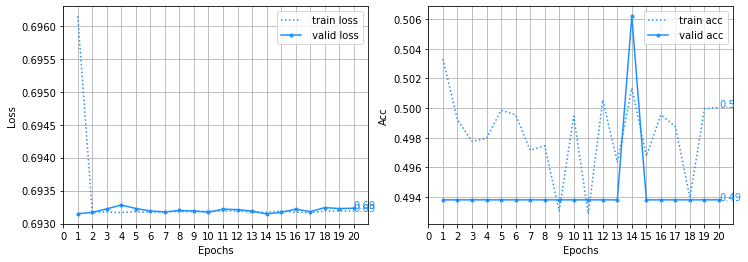

In [ ]:
from plot_result import plot_lcurve
plot_lcurve([history],[''],['dodgerblue'])

## 추가 학습 : 규제 적용하기
---

In [ ]:
def create_regular_model(max_len, max_features, emb_dims):
  x = layers.Input(shape=max_len)
  y = layers.Embedding(max_features, emb_dims)(x)
  y = layers.Flatten()(y)
  y = layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1))(y)
  y = layers.Dense(1, activation='sigmoid')(y)
  return models.Model(x,y)




model = create_regular_model(max_len, max_features, 100)
model.summary()
model.layers[1].set_weights([embed_mx]) # 가중치를 Glove 값으로 초기화


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 100, 100)          50000     
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                320032    
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 370,065
Trainable params: 370,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
625/625 [==============================] -

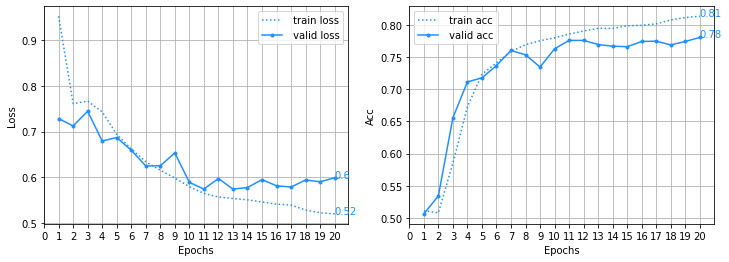

In [ ]:
from plot_result import plot_lcurve
plot_lcurve([history],[''],['dodgerblue'])